## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [6]:
import pandas as pd
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [82]:
df = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv")
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [83]:
df.info() #пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [84]:
# Количественные - duration, amount, age
# Бинарные (можно закодировать 0 и 1, т.к. всего 2 категории) - people_liable, telephone, foreign_worker, credit_risk
# Порядковые - employment_duration, installment_rate, present_residence, number_credits
# Категориальные - status, credit_history, purpose, savings, personal_status_sex, other_debtors, property, other_installment_plans, housing, job

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [85]:
df.groupby('purpose').apply(lambda x : x.mean())['amount']

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [86]:
print(len(df.loc[(df.age < 30) & (df.housing == 'rent')]) / len(df.loc[df.age < 30]) * 100, "%")
print(len(df.loc[(df.age > 40) & (df.housing == 'rent')]) / len(df.loc[df.age > 40]) * 100, "%")

66.66666666666666 %
68.01470588235294 %


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [87]:
len(df.loc[(df.foreign_worker == 'yes') & ((df.number_credits == '4-5') | (df.number_credits == '>= 6'))])

1

### Задание 6 (1 балл)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

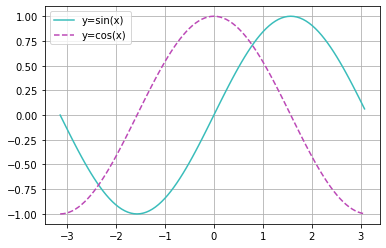

In [88]:
x = np.arange(-np.pi, np.pi, 2*np.pi/100)
y = np.sin(x)
plt.plot(x, y, color='#3ABDBB')

x = np.arange(-np.pi, np.pi, 2*np.pi/100)
y = np.cos(x)
plt.plot(x, y, color='#BC49B7', linestyle='--')
plt.grid()
plt.legend(('y=sin(x)', 'y=cos(x)'))

plt.show()

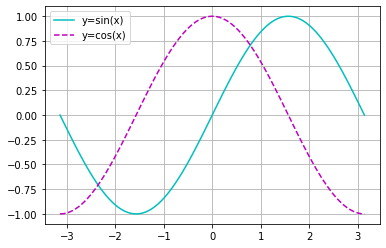

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

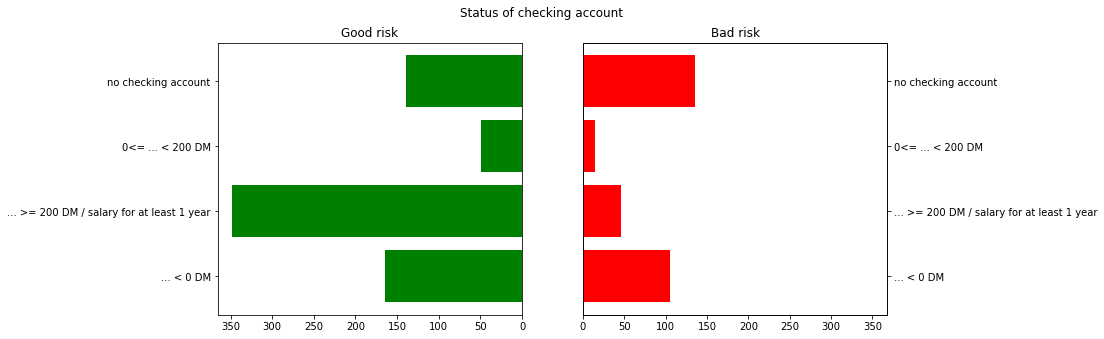

In [89]:
good = df.loc[df.credit_risk == 'good']['status'].value_counts()
bad = df.loc[df.credit_risk == 'bad']['status'].value_counts()

# plotting
fig = plt.figure(figsize=(12,5))
fig.suptitle('Status of checking account')

# Plot 1
scale = max(good)
x = sorted(good.keys())
y = good[x]
ax = plt.subplot(1, 2, 1)
plt.title('Good risk')
ax.invert_xaxis()
plt.barh(x, y, color='green', align='center')

# Plot 2
ax = plt.subplot(1, 2, 2)
x = sorted(bad.keys())
y = bad[x]
ax.set_xlim(scale+20,0)
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_yticks([])
plt.title('Bad risk')
ax1 = ax.twinx() 
ax1.barh(x, y, color='red', align='center')

plt.show()

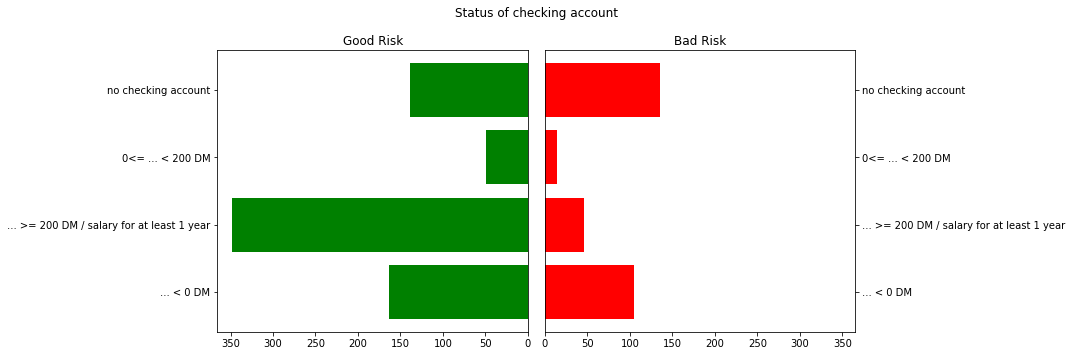

### Задание 8  (0.5 балла)

In [38]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

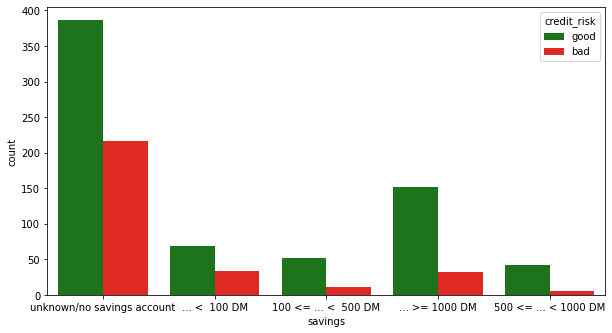

In [90]:
# seaborn приятнее в плане написания кода
# С точки зрения восприятия результата - вертикальные столбцы более привычные
colors = ["#10820F", "#FF0B04"]
sns.set_palette(sns.color_palette(colors))
sns.countplot(data=df, x='savings', hue='credit_risk')

fig = plt.gcf()
fig.set_size_inches(10, 5.3)
plt.show()

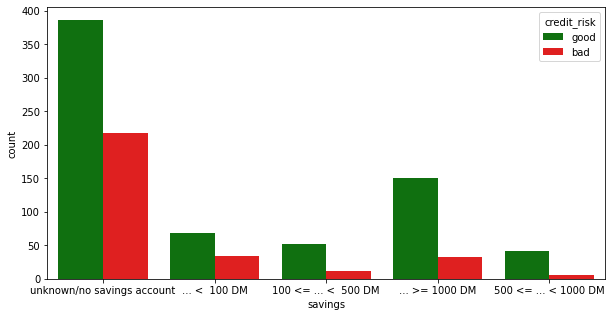

In [11]:
# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

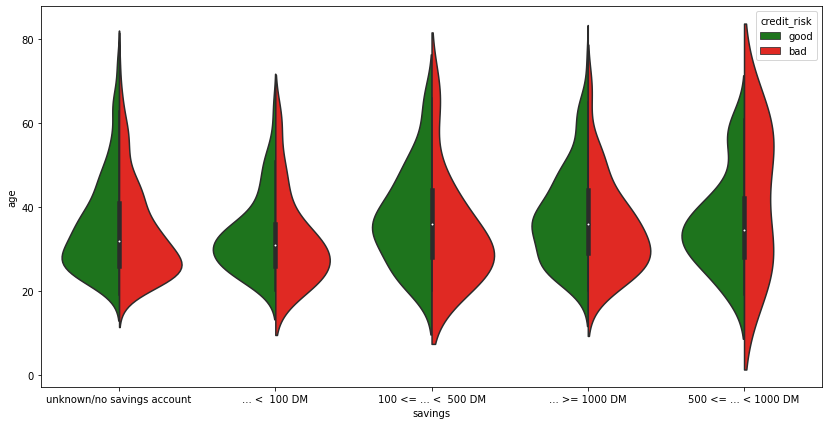

In [91]:
colors = ["#10820F", "#FF0B04"]
sns.set_palette(sns.color_palette(colors))
sns.violinplot(data=df, x='savings', y='age', hue='credit_risk', split=True)

fig = plt.gcf()
fig.set_size_inches(14, 7)
plt.show()

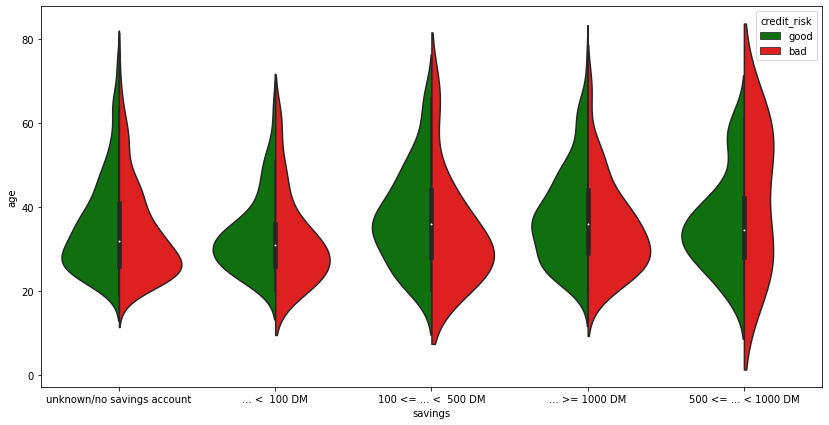

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

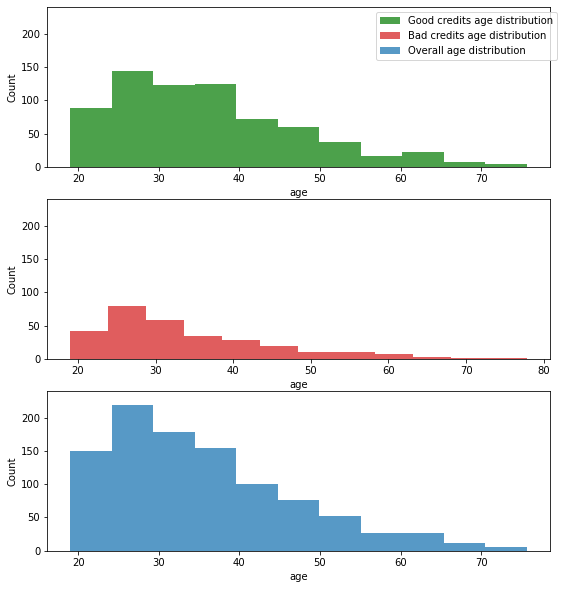

In [92]:
fig, axs = plt.subplots(nrows=3)
axs[0].set_ylim(0,240)
axs[1].set_ylim(0,240)
axs[2].set_ylim(0,240)

sns.histplot(df.loc[df.credit_risk == 'good'], x="age", ax=axs[0], binwidth=5.15, edgecolor='None', color='#10820F')
sns.histplot(df.loc[df.credit_risk == 'bad'], x="age", ax=axs[1], binwidth=4.9, edgecolor='None', color='tab:red')
sns.histplot(df, x="age", ax=axs[2], binwidth=5.15, edgecolor='None', color='tab:blue')

fig.set_size_inches(9,10)

fig.legend(["Good credits age distribution","Bad credits age distribution", "Overall age distribution"],
           loc='upper right', bbox_to_anchor=(0.5, 0., 0.42, 0.88))
plt.show()

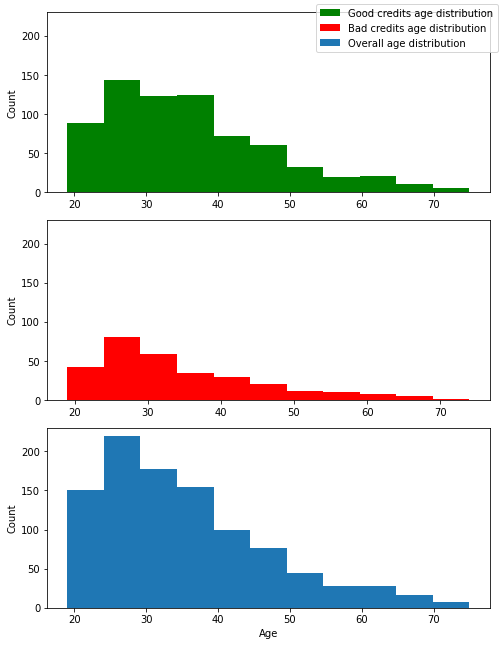

In [13]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

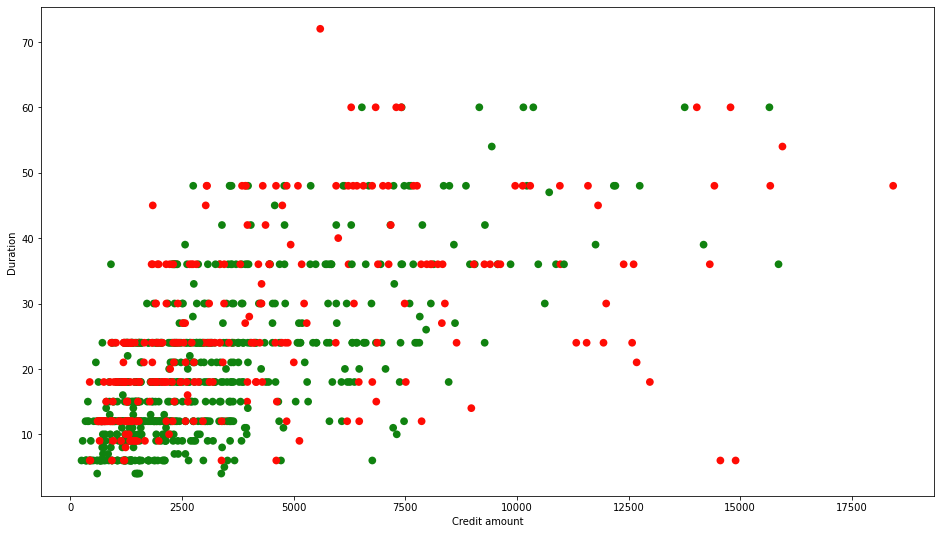

In [93]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="amount", y="duration", hue='credit_risk', s=60, linewidth=0, legend=False)
fig.set_size_inches(16, 9)
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
plt.show()

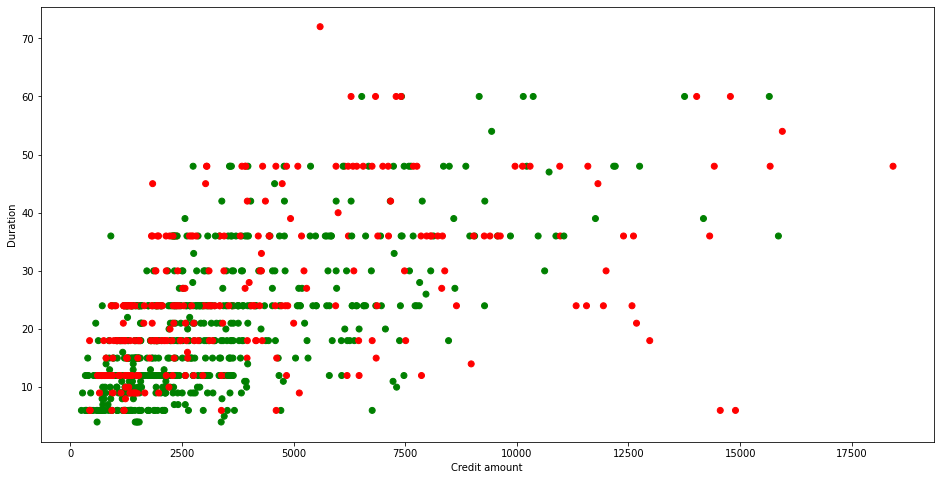

In [21]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

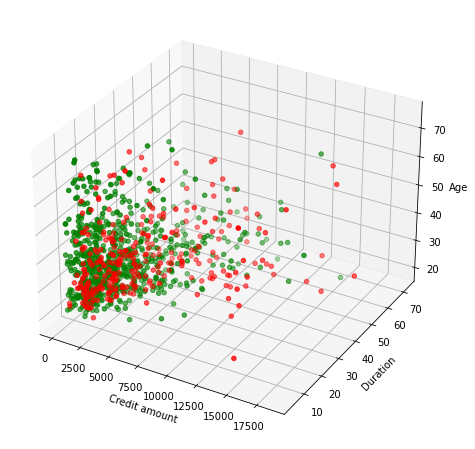

In [94]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

bad_df = df.loc[df.credit_risk == 'bad']
good_df = df.loc[df.credit_risk == 'good']

x_bad, x_good = bad_df['amount'], good_df['amount']
y_bad, y_good = bad_df['duration'], good_df['duration']
z_bad, z_good = bad_df['age'], good_df['age']

ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

ax.scatter(x_bad, y_bad, z_bad, color='red')
ax.scatter(x_good, y_good, z_good, color='green')

plt.show()

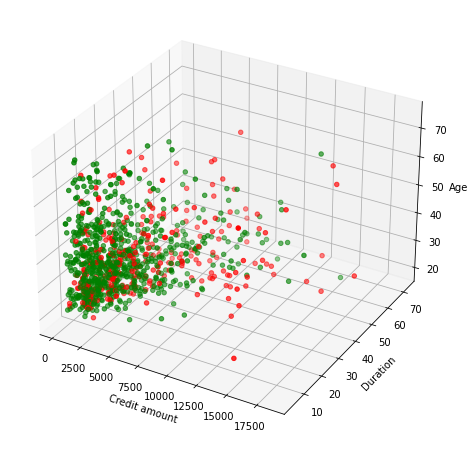

In [15]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [95]:
# Бинарные
df['credit_risk'] = df['credit_risk'].apply(lambda x: 1 if x == 'good' or x == 1 else 0)
df['telephone'] = df['telephone'].apply(lambda x: 1 if x == 'yes (under customer name)' or x == 1 else 0)
df['foreign_worker'] = df['foreign_worker'].apply(lambda x: 1 if x == 'yes' or x == 1 else 0)
df['people_liable'] = df['people_liable'].apply(lambda x: 1 if x == '3 or more' or x == 1 else 0)

# Порядковые
employment_duration = {'unemployed' : 0, '< 1 yr' : 1, '1 <= ... < 4 yrs' : 2, '4 <= ... < 7 yrs' : 3, '>= 7 yrs' : 4}
df['employment_duration'] = df['employment_duration'].apply(lambda x: employment_duration[x])

installment_rate = {'< 20' : 0, '20 <= ... < 25' : 1, '25 <= ... < 35' : 2, '>= 35' : 3}
df['installment_rate'] = df['installment_rate'].apply(lambda x: installment_rate[x])

present_residence = {'< 1 yr' : 0, '1 <= ... < 4 yrs' : 1, '4 <= ... < 7 yrs' : 2, '>= 7 yrs' : 3}
df['present_residence'] = df['present_residence'].apply(lambda x: present_residence[x])

number_credits = {'1' : 0, '2-3' : 1, '4-5' : 2, '>= 6' : 3}
df['number_credits'] = df['number_credits'].apply(lambda x: number_credits[x])

# Категориальные
df = pd.concat([df, pd.get_dummies(df['status'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['credit_history'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['purpose'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['savings'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['personal_status_sex'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['other_debtors'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['property'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['other_installment_plans'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['housing'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['job'])], axis=1)
df.drop(['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors',
         'property', 'other_installment_plans', 'housing', 'job'], axis=1, inplace=True)
df

,duration,amount,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,...,bank,none,stores,for free,own,rent,manager/self-empl./highly qualif. employee,skilled employee/official,unemployed/unskilled - non-resident,unskilled - resident
0,18,1049,1,0,3,21,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,9,2799,2,2,1,36,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
2,12,841,3,2,3,23,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,12,2122,2,1,1,39,1,1,0,1,...,0,1,0,1,0,0,0,0,0,1
4,12,2171,2,0,3,38,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,2,2,3,21,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
996,24,2303,4,0,0,45,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
997,21,12680,4,0,3,30,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
998,12,6468,0,2,0,52,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [81]:
# Расстояние между двумя объектами
def dist(row1, row2):
    distance = 0.0
    # Несколько своих весов
    w = dict((column,1) for column in (df.columns).tolist())
    w['duration'] = 2.6 / 72 ** 2
    w['age'] = 2.6 / 75 ** 2
    w['amount'] = 2.6
    w['number_credits'] = 2.6
    w['amount'] = 1 / 18424 ** 2
    w['installment_rate'] = 2.6
    
    for i in range(len(row1)):
        distance += (w[df.columns[i]]* (row1[i] - row2[i])**2)
    return np.sqrt(distance)

# Метод knn
def predict(Xtest: np.array) -> np.array:
    # Ближайшие соседи
    k = 20
    result = np.array([])
    # Проходимся по каждой строчке из тестового набора
    for row in Xtest:
        # Считаем расстояние между текущим объектом и объектами из обучающей выборки
        predicate = [dist(row, X_train[i]) for i in range(len(X_train))]
        
        # Определяем порядок по расстоянию от предсказываемого объекта
        order = np.argsort(predicate)
        X_sorted = X_train[order]
        y_sorted = y_train[order]
        
        # Подсчитываем к какой категории из k сосеседей лучше отнести результат
        good = 0
        for i in range(k):
            good += y_sorted[i]
        if good > k-good:
            result = np.append(result, 1)
        else:
            result = np.append(result, 0)
            
    # Возвращаем массив целевых переменных для тестового набора
    return result

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('credit_risk', 1).values
y = df['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

0.7

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

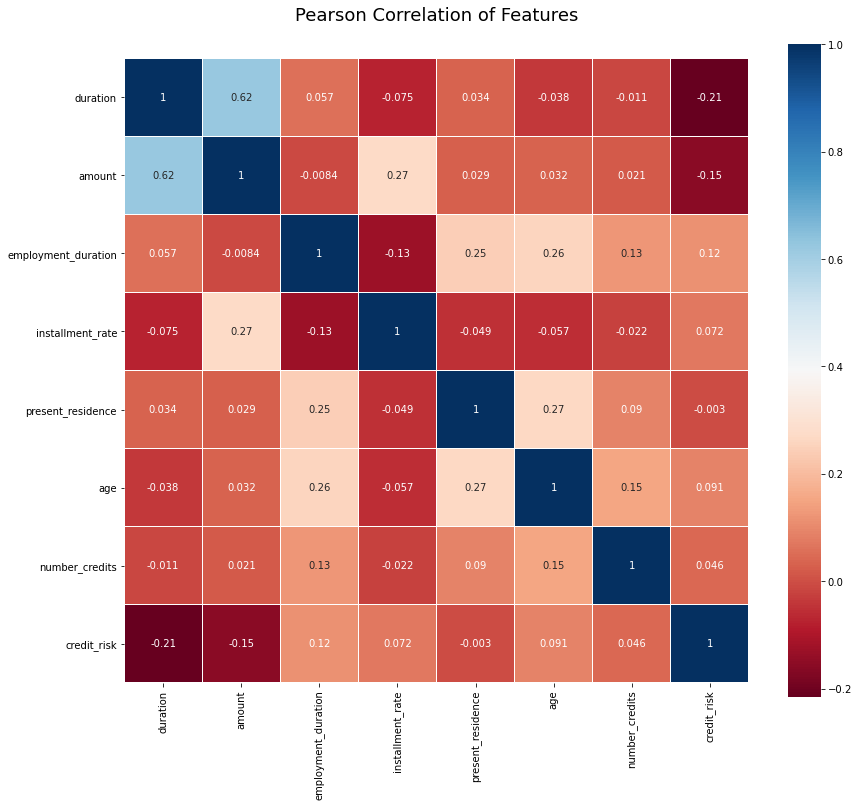

In [43]:
# Чтобы посмотреть степень влияния на credit_risk
NumericData = df._get_numeric_data()
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)